### Use ChatGPT and IDA Model to find the topic in recent Canada Education news
* Search education news on CBC(Canadian Broadcasting Corporation) News
* Store news report contents in txt files respectively
* Use the codes below to analyze the most popular 3 topic
* Data Date : 2023/4/12

[CBC: Search for Education](https://www.cbc.ca/search?q=education&section=news&sortOrder=relevance&media=all)  
[IDA Model introduction](https://blog.csdn.net/qq_39496504/article/details/107125284)

In [49]:
import openai
import pandas as pd

In [50]:
#List all txt documents in folder
import os
txt_files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.txt')]
print(txt_files)

['news_09.txt', 'news_08.txt', 'news_03.txt', 'news_02.txt', 'news_01.txt', 'news_05.txt', 'news_04.txt', 'news_10.txt', 'news_06.txt', 'news_07.txt']


In [51]:
#Read every document and merge them into a string of text
#Remove trivial words
replacelist = ["\n","\u200b","\\"]
tmp = ''
for i in txt_files:
    with open(i, 'r',) as fh:
        print(i)
        news = str(fh.read())
        for i in replacelist:
                news = news.replace(i, '')
        tmp = tmp + news
print(len(tmp))

news_09.txt
news_08.txt
news_03.txt
news_02.txt
news_01.txt
news_05.txt
news_04.txt
news_10.txt
news_06.txt
news_07.txt
78542


In [52]:
keyfile = open("/Users/anderson/Desktop/Data Science/OpenAI/key.txt", "r")
key = keyfile.readline()
openai.api_key = key

In [53]:
#Set the lengh of every paragraph
plength = 3200
max_i = int(len(tmp)/plength) + 1
data = []
for i in range(0,max_i):
    data.append(tmp[ i*plength : (i+1)*plength ])
print(max_i,'\n',data[-1])
print(len(data))

25 
 to retire — he's 80VIDEO A day in the life of a family doctorCBC INVESTIGATES Only a handful of family doctors in Ottawa accepting new patientsKingston, Ont., has a profound doctor shortage. Here's whyPhones ringing off the hook at medical clinic taking new patientsPopular Now in News1CBC INVESTIGATESTroubled Calgary builder leaves Edmonton homebuyers with mortgages to pay on unfinished homes355 reading now2Trudeau Foundation president, board resign, citing 'politicization' of China-linked donation271 reading now3Tupperware shares tank as company warns it may go out of business143 reading now4What we know about the leaked U.S. Pentagon documents on the Ukraine war — and potential impact136 reading now5Manhattan district attorney sues Republican Jim Jordan over Trump prosecution112 reading nowFooter LinksMy AccountProfileCBC GemNewslettersAbout CBC AccountsConnect with CBCFacebookTwitterYouTubeInstagramMobileRSSPodcastsContact CBCSubmit FeedbackHelp CentreAudience Relations, CBCP.O

In [54]:
def chatgptfn(sub_list):
    result = ''
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an assistant"},
            {"role": "user", "content": f"{sub_list} :give me a summary"}
        ]
    )
    for choice in response.choices:
        result += choice.message.content
    return result

In [55]:
#Input a paragraph into ChatGPT and display the returned summary
for i in range(0,10):
    data[i] = chatgptfn(data[i])
    print(i)
    print(data[i])

The Manitoba Indigenous Cultural Education Centre (MICEC) in Winnipeg has reopened to the public after three years of the pandemic shutdown. The centre is planning to display over 1,000 art pieces in 10 new exhibitions that explore Indigenous culture and history. The first exhibition, curated by Danielle Mason, documents MICEC's history as a non-profit organization that provides education and understanding of Indigenous culture. Despite being closed throughout the pandemic, MICEC continued to offer online services, such as language tables, to protect vulnerable populations. Mason hopes the collection will inspire up-and-coming artists and draw more attention to the centre's work.
The National Council of Canadian Muslims has vowed to monitor the Quebec government's ban on public school prayer spaces. Earlier this month, Education Minister Bernard Drainville promised to prohibit schools from setting aside classrooms for religious purposes after reports emerged that at least two Montreal-

In [56]:
#Input a paragraph into ChatGPT and display the returned summary
for i in range(10,20):
    data[i] = chatgptfn(data[i])
    print(i)
    print(data[i])

The article discusses the use of ChatGPT, an artificial intelligence tool, in Canadian schools and the divided opinions of educators on its impact on education. Some argue that it should be banned, while others suggest incorporating it into learning while focusing on critical thinking and creativity. The article also includes comments from teachers and readers.
ChatGPT, an artificial intelligence chatbot, has become a popular tool among students for completing their assignments. However, its use is causing apprehension in the education sector, with concerns about cheating and the quality of the answers provided. While some teachers have embraced ChatGPT and introduced it in their classrooms as an innovative learning tool, others are wary of its implications on students' learning and motivation. High school teacher Jamie Mitchell tried using ChatGPT to help his students solve calculus problems, but found that the tool made mistakes that his students quickly picked up on, proving that it

In [57]:
#Input a paragraph into ChatGPT and display the returned summary
for i in range(20,len(data)):
    data[i] = chatgptfn(data[i])
    print(i)
    print(data[i])

The competition for family doctors in rural areas of Ontario is becoming increasingly competitive, with municipalities offering their own cash incentives to attract medical professionals. This is due to a shortage of doctors in rural areas, which has not been adequately addressed by provincial bonuses for doctors practising in these communities. Provincial policies also make it more difficult for rural practices to turn a profit, causing physicians to become more mobile and move to areas where they can increase their earnings. While local cash incentives can help, increasing provincial incentives would be a better solution.
Eastern Ontario communities are offering cash incentives to family doctors in an effort to lure them to their areas due to a lack of available physicians. Quinte West, located near Belleville, currently offers doctors a financial incentive of $100,000 in exchange for a five-year commitment to the city. The practice of offering doctors incentives appears to be growin

In [58]:
#print(data[19])

In [59]:
import gensim
from gensim import corpora
from pprint import pprint

In [60]:
# 創建詞袋
texts = [[word for word in document.lower().split()] for document in data]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [61]:
# 訓練 LDA 模型
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
                                            num_topics=3, random_state=100, update_every=1, 
                                            chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [63]:
#!pip install pyLDAvis

In [62]:
# 輸出主題模型分析結果
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


#### TOPIC 1 
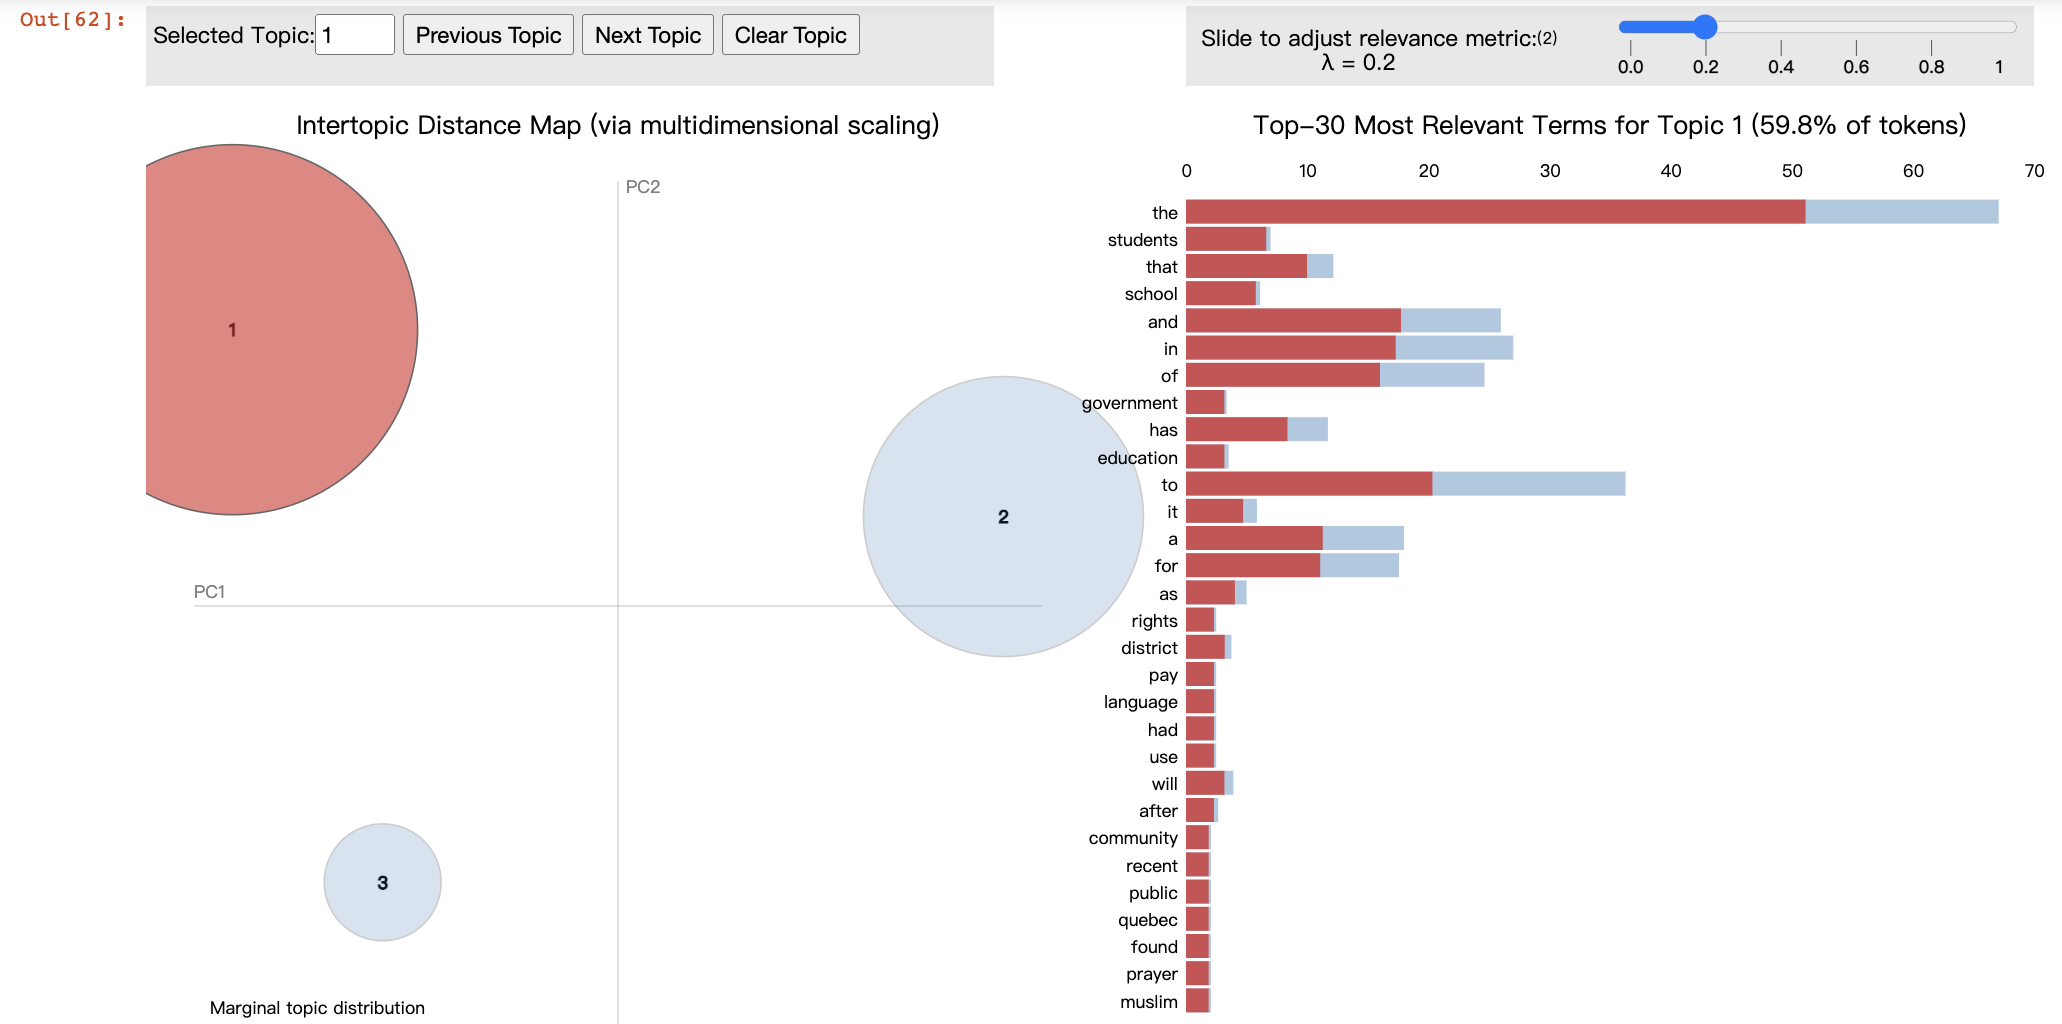

#### TOPIC 2
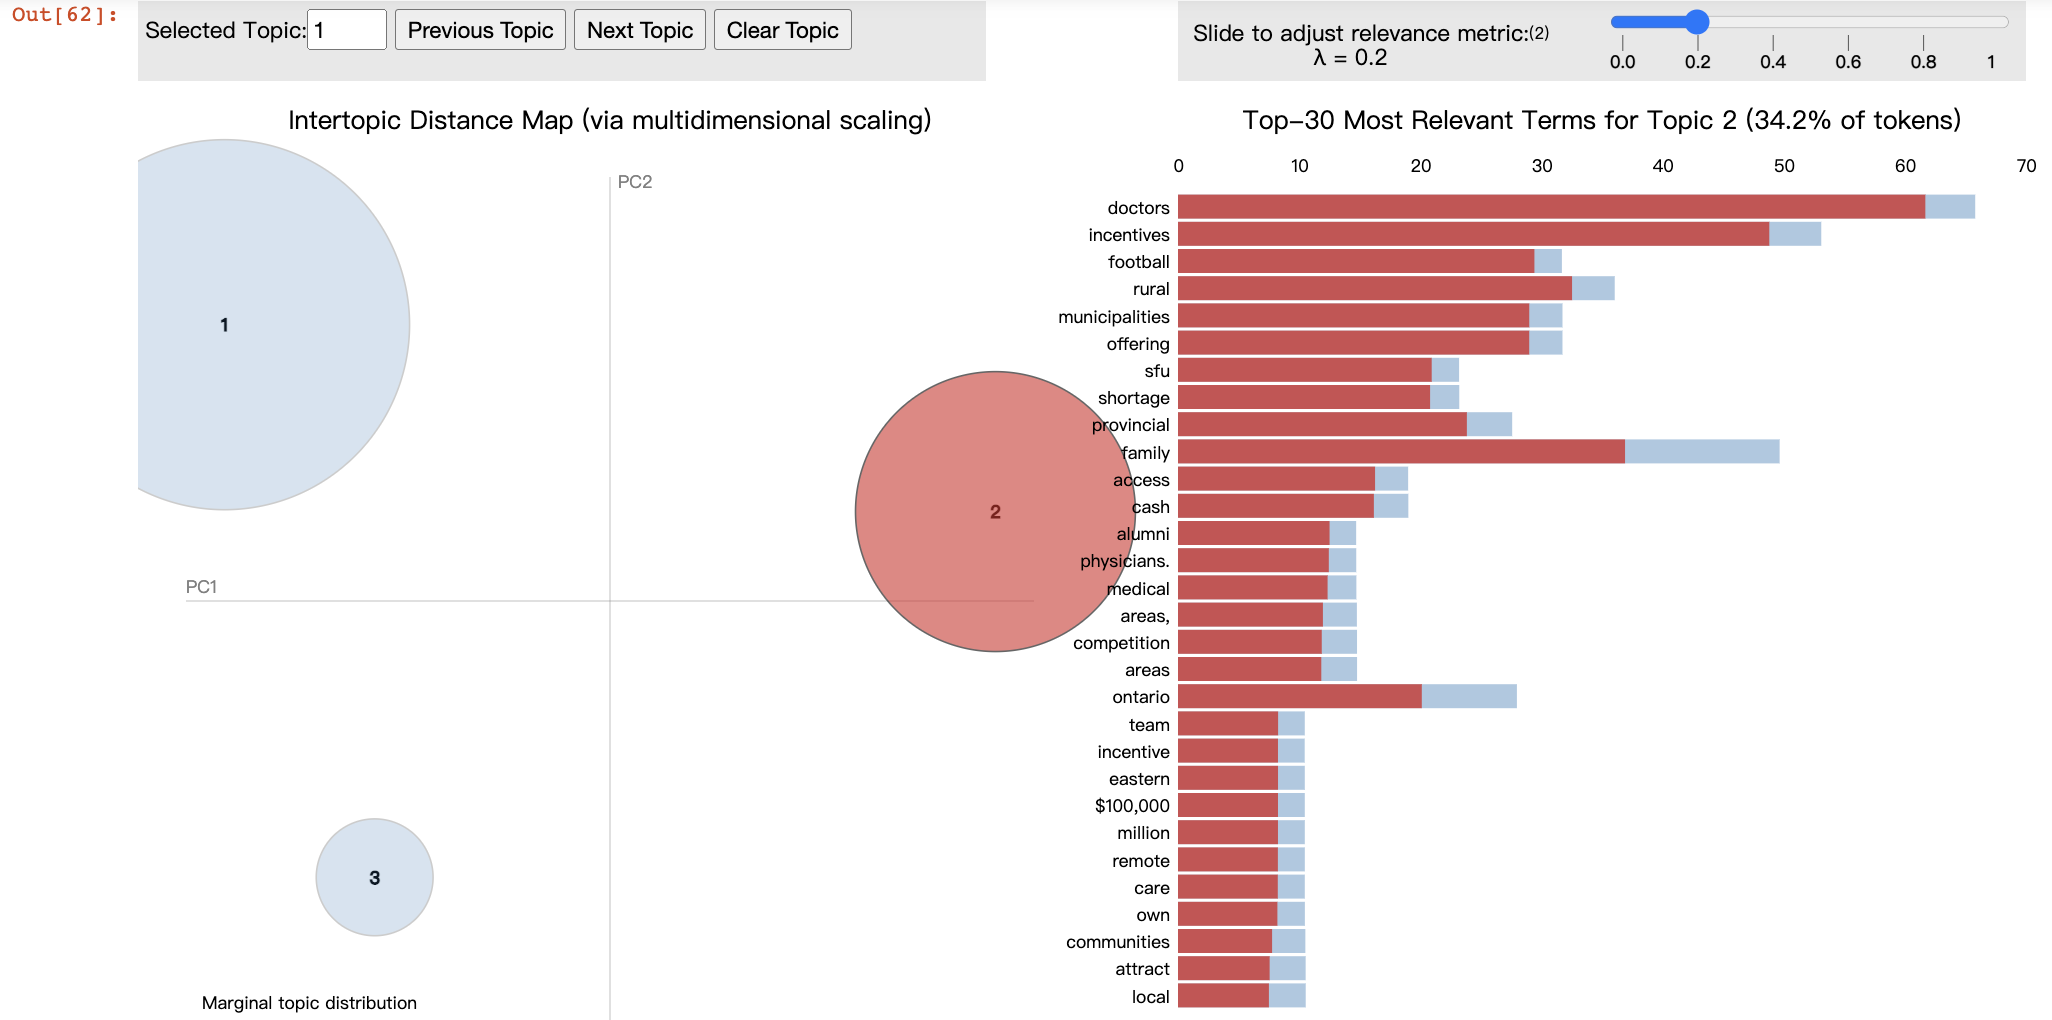

#### TOPIC 3
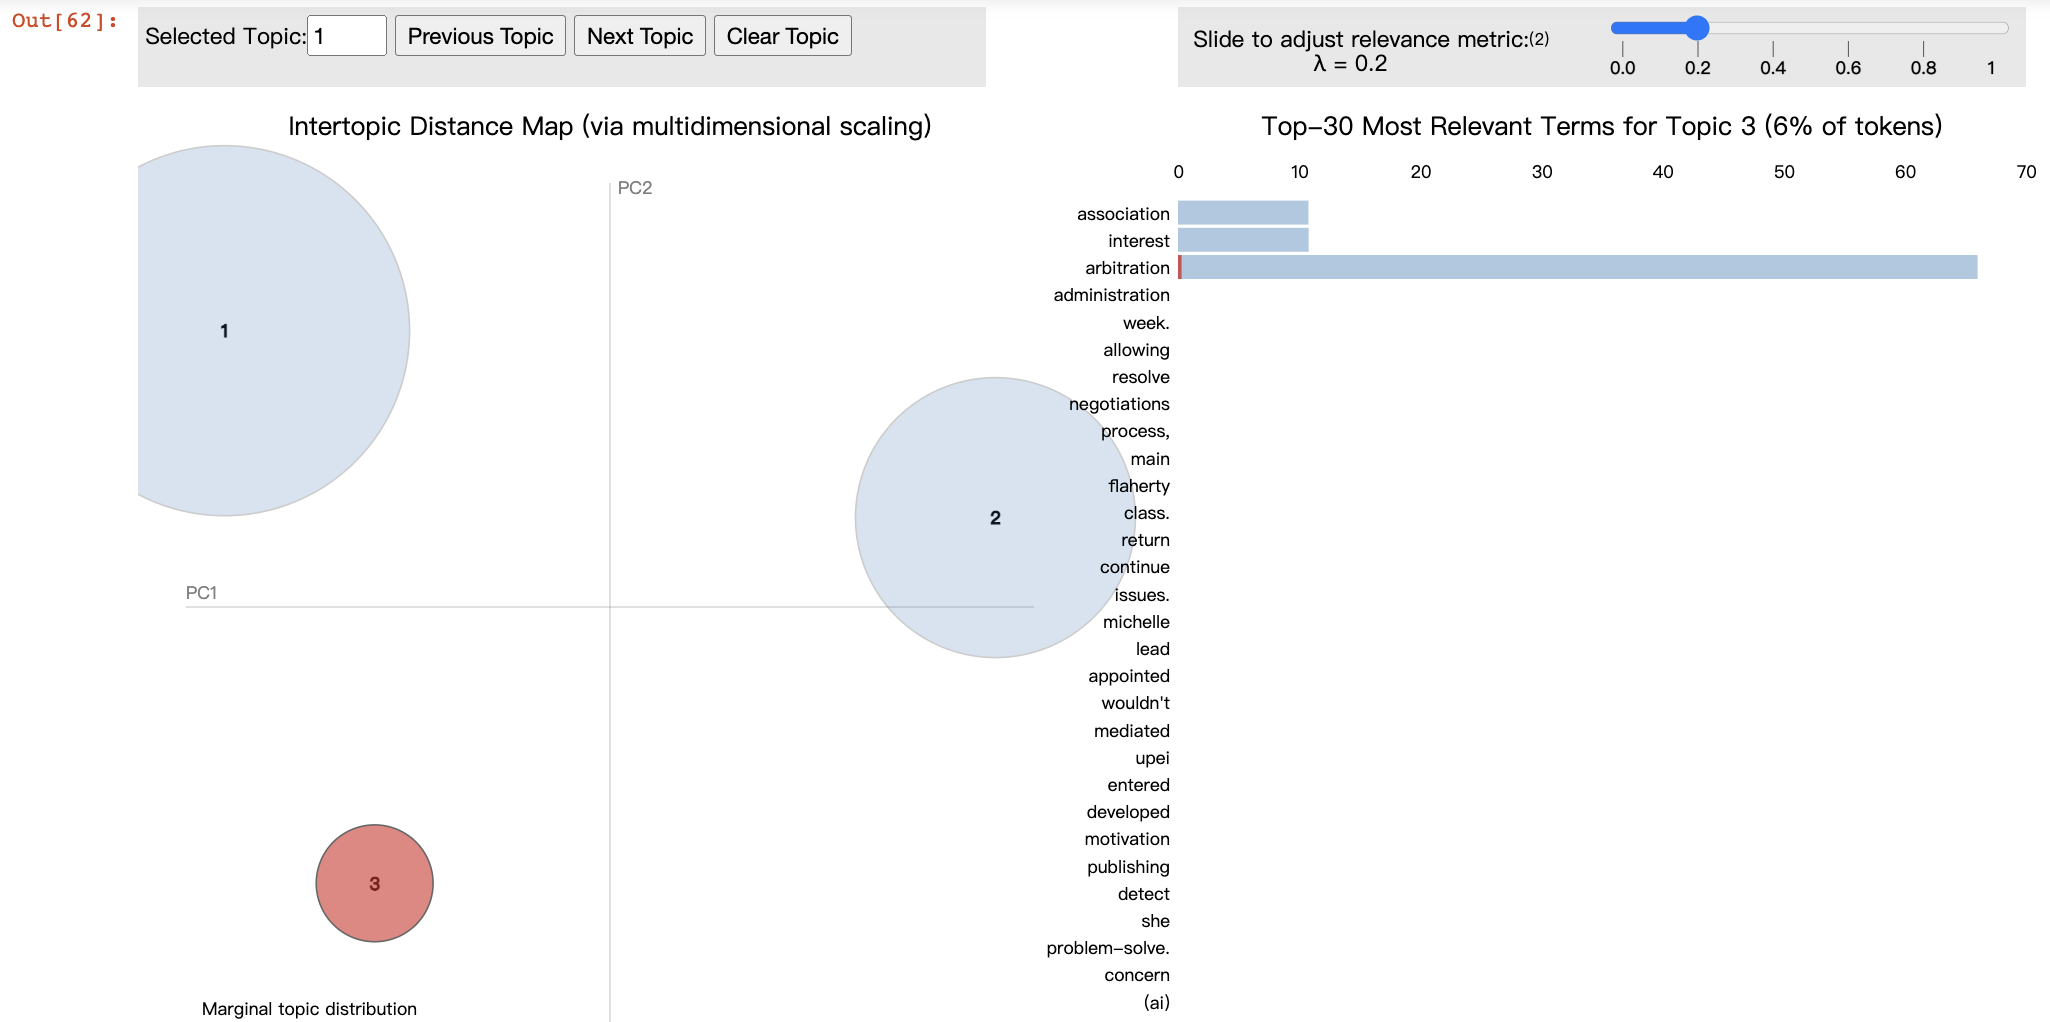